# k Means Clustering (from scratch)

In [1]:
#importing useful libraries
import pandas as pd
import numpy as np
import random  as rd
import matplotlib.pyplot as plt

In [2]:
#reading data from csv file named as 'data'
data = pd.read_csv('clustering_data.csv')

#fetching data
x1 = data.iloc[:,0].values
x2 = data.iloc[:,1].values

In [3]:
#############defining functions#################
import math

def euc_dis(Centroids,X):
              ld=[]
              for sctr_pt in X: #the scatter point from the data X will come int the form of (x,y)
                            l=[]
                            for cen in Centroids:  #same as above, (a,b)

                                     #calculating euclidean distace
                                     dis = math.pow((sctr_pt[0]-Centroids[cen][0])**2+(sctr_pt[1]-Centroids[cen][1])**2,(1/2))
                                     l.append((dis,cen,sctr_pt))
                            sort_l = sorted(l) #distances are sorted
                            ld.append(sort_l[0]) #the minimum distance is taken, come out to be a tuple
              return ld

def make_centroid_dic(c): #this function make a dictionary of the K centroids
              d=[]
              for i in range(K):
                       d.append(i+1)
              Centroids={}
              for key in d: 
                  for value in c: 
                      Centroids[key] = value    #{1:[4856,128],2:}
                      c.remove(value)    
                      break
         
              return Centroids

#computing new centroids
def n_cen(Centroids,X):
              l1=[]
              l2=[]
              l3=[]
              su_m=0
              distances = euc_dis(Centroids,X)

              #classifying the points, belonging from the nearest centroids, into K diff. clusters
              #the lists are describing the K diff. clusters.
              for min_dis in distances:
                            if (min_dis[1]==1):
                                          l1.append(min_dis) #blue(1)
                            elif(min_dis[1]==2):
                                          l2.append(min_dis) #red(2)
                            elif(min_dis[1]==3):
                                          l3.append(min_dis) #green(3)
                           
              mean1_x=mean2_x=mean3_x=0
              mean1_y=mean2_y=mean3_y=0
              #calculating the means of the points belongs to same cluster form by the centroid
              for i in l1: #i is in the form of tuple
                            mean1_x=mean1_x+i[2][0]
                            mean1_y=mean1_y+i[2][1] 
              mean1_x=mean1_x/len(l1)
              mean1_y=mean1_y/len(l1)
              for i in l2: #i is in the form of tuple
                            mean2_x=mean2_x+i[2][0]
                            mean2_y=mean2_y+i[2][1]
              mean2_x=mean2_x/len(l2)
              mean2_y=mean2_y/len(l2)
              for i in l3: #i is in the form of tuple
                            mean3_x=mean3_x+i[2][0]
                            mean3_y=mean3_y+i[2][1]
              mean3_x=mean3_x/len(l3)
              mean3_y=mean3_y/len(l3)
              
              mean=[]
              mean.append([mean1_x,mean1_y])
              mean.append([mean2_x,mean2_y])
              mean.append([mean3_x,mean3_y])
              
              Centroids=make_centroid_dic(mean) #here, we get our new centroids
              
              return Centroids,l1,l2,l3

In [4]:
###############main#####################

#initializing the value of K
K=3

#select random observation as centroids
X=[]
for i in range(len(x1)):
         X.append([x1[i],x2[i]])

#select random Centroids. Initially, the centroids are chosen randomly from the dataset.
rd.seed(42)
#rd.seed fixes the randomly taken value
c = []
for _ in range(K):
         c.append(rd.choice(X))

d=[]
for i in range(K):
         d.append(i+1)
Centroids={}
for key in d: 
    for value in c: 
        Centroids[key] = value    #the dictionary will be in the form {1:[4856,128],2:...upto the value of K}
        c.remove(value)    
        break

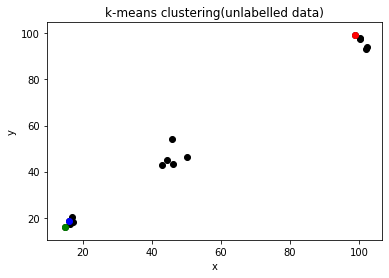

In [5]:
#plotting the unlabelled datapoints
plt.scatter(x1,x2,c='black')
colmap = {1:'r',2:'b',3:'g'} # taking diff. colors in dictionary so as to assign it to diff. centroids

for i in Centroids.keys():
         plt.scatter(*Centroids[i],color=colmap[i])
plt.xlabel('x')
plt.ylabel('y')
plt.title('k-means clustering(unlabelled data)')
plt.show()

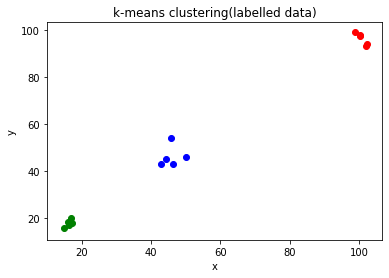

In [6]:
# Plotting the labelled datapoints i.e., the formed clusters
for _ in range(5):
              Centroids,l1,l2,l3=n_cen(Centroids,X)

for r in l1:
              plt.scatter(r[-1][0],r[-1][1],c='red')
for b in l2:
              plt.scatter(b[-1][0],b[-1][1],c='blue')
for g in l3:
              plt.scatter(g[-1][0],g[-1][1],c='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('k-means clustering(labelled data)')
plt.show()